In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
imdb = pd.read_csv('./data/IMDb_movies.csv')
quotes = pd.read_json('data/quotes-2020-domains.json', lines=True)
box_office = pd.read_csv('./data/time_series_box_office_data/Star_Wars_Episode_IX___The_Rise_of_Skywalker___Box_Office_Mojo.csv')

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


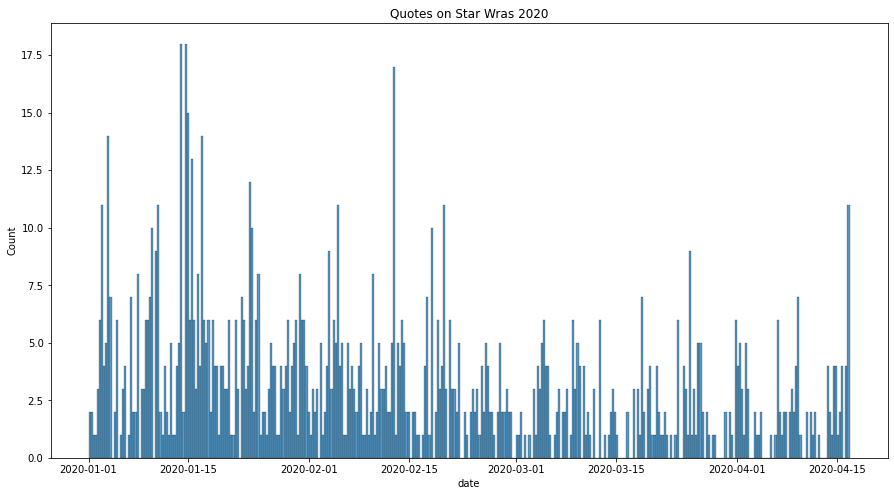

In [3]:
plt.figure(figsize = (15,8))
plt.title('Quotes on Star Wras 2020')
p = sns.histplot(data = quotes['date'], bins=365)


In [4]:
#converting strings to datetime
box_office['days'] = pd.to_datetime(box_office['days'])
#compute cumulative sum
box_office['cumulative_sum'] = box_office['daily'].cumsum()
box_office

,Unnamed: 0,days,dow,rank,daily,theaters,special events,cumulative_sum
0,0,2019-12-20,Friday,1,89615288.0,4406,NaN,89615288.0
1,1,2019-12-21,Saturday,1,47467565.0,4406,NaN,137082853.0
2,2,2019-12-22,Sunday,1,40301011.0,4406,NaN,177383864.0
3,3,2019-12-23,Monday,1,29389847.0,4406,NaN,206773711.0
4,4,2019-12-24,Tuesday,1,20270474.0,4406,NaN,227044185.0
...,...,...,...,...,...,...,...,...
86,86,2020-03-15,Sunday,23,19272.0,189,COVID-19 Pandemic,515192185.0
87,87,2020-03-16,Monday,18,6756.0,189,COVID-19 Pandemic,515198941.0
88,88,2020-03-17,Tuesday,18,2465.0,189,COVID-19 Pandemic,515201406.0
89,89,2020-03-18,Wednesday,16,554.0,189,COVID-19 Pandemic,515201960.0


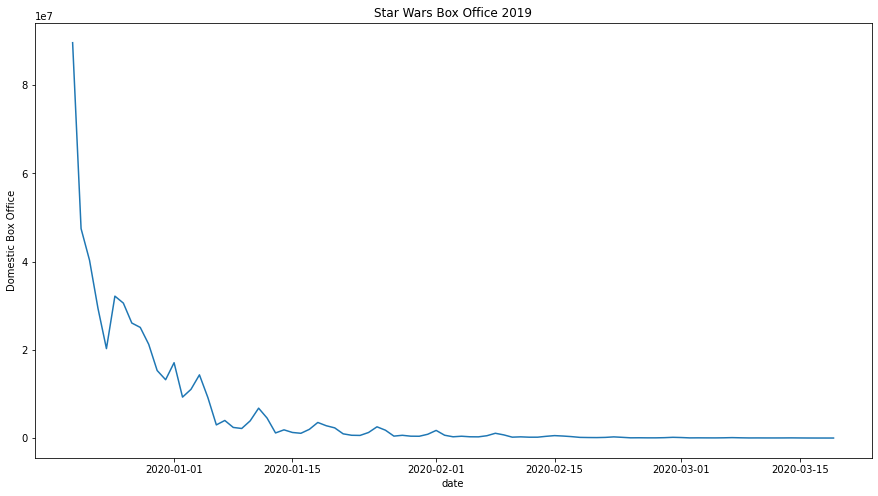

In [5]:
plt.figure(figsize = (15,8))
plt.title('Star Wars Box Office 2019')
#plt.yscale("log")
plt.xlabel('date')
plt.ylabel('Domestic Box Office')
p = sns.lineplot(data = box_office, x='days', y='daily')

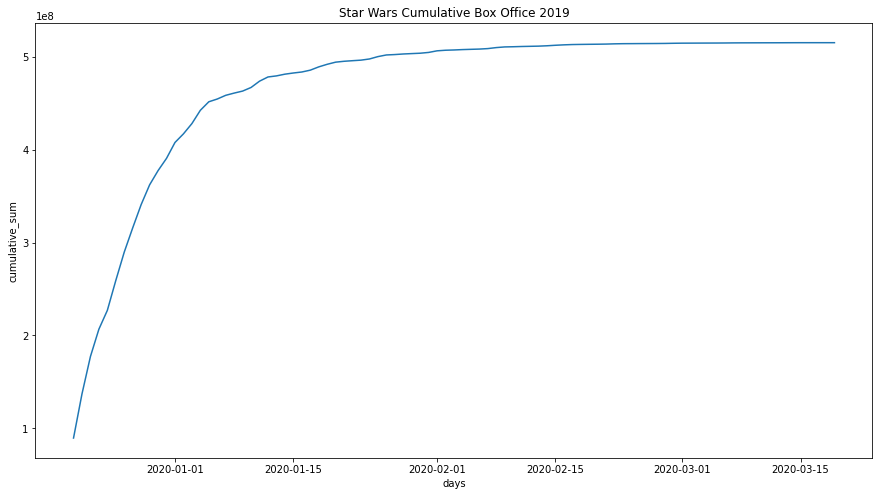

In [6]:
plt.figure(figsize = (15,8))
plt.title('Star Wars Cumulative Box Office 2019')
p = sns.lineplot(data = box_office, x='days', y='cumulative_sum')

In [34]:
# cleaning imbd movies
imdb = imdb
imdb = imdb.drop(imdb.index[83917])
imdb['year'] = imdb['year'].astype(int)
imdb = imdb[imdb['year']>2015]
imdb = imdb.drop(columns=['usa_gross_income'])
imdb = imdb.dropna()
imdb[imdb['country'].str.contains('USA')]
imdb.isnull().values.any()
imdb = imdb.rename(columns = {'worlwide_gross_income':'worldwide_gross_income'})
imdb['budget'] = imdb['budget'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
imdb['worldwide_gross_income'] = imdb['worldwide_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
imdb

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,production_company,actors,description,avg_vote,votes,budget,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
44619,tt0385887,Motherless Brooklyn - I segreti di una città,Motherless Brooklyn,2019,2019-11-07,"Crime, Drama, Mystery",144,USA,"English, French",Edward Norton,...,Warner Bros. Pictures,"Edward Norton, Gugu Mbatha-Raw, Alec Baldwin, ...","In 1950s New York, a lonely private detective ...",6.8,34759,26000000,18477736,60.0,319.0,178.0
46723,tt0437086,Alita - Angelo della battaglia,Alita: Battle Angel,2019,2019-02-14,"Action, Adventure, Sci-Fi",122,"USA, Japan, Canada","English, Spanish",Robert Rodriguez,...,Twentieth Century Fox,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...",7.3,217183,170000000,404852543,53.0,2757.0,368.0
47132,tt0448115,Shazam!,Shazam!,2019,2019-04-03,"Action, Adventure, Comedy",132,"USA, Canada","English, Spanish",David F. Sandberg,...,Warner Bros.,"Zachary Levi, Mark Strong, Asher Angel, Jack D...",A newly fostered young boy in search of his mo...,7.1,240858,100000000,365971656,71.0,2009.0,379.0
47292,tt0451279,Wonder Woman,Wonder Woman,2017,2017-06-01,"Action, Adventure, Fantasy",141,"USA, China, Hong Kong","English, German, Dutch, French, Spanish, Chine...",Patty Jenkins,...,Warner Bros.,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",When a pilot crashes and tells of conflict in ...,7.4,535903,149000000,821847012,76.0,2200.0,713.0
48382,tt0475290,"Ave, Cesare!","Hail, Caesar!",2016,2016-03-10,"Comedy, Drama, Music",106,"USA, UK, Japan",English,"Ethan Coen, Joel Coen",...,Universal Pictures,"Josh Brolin, George Clooney, Alden Ehrenreich,...",A Hollywood fixer in the 1950s works to keep t...,6.3,121472,22000000,63647656,72.0,449.0,493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",A comedy about what can happen when you love y...,6.1,17038,5000000,9341824,39.0,234.0,42.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,"""Weathering With You"" Film Partners","Kotaro Daigo, Nana Mori, Shun Oguri, Sei Hirai...",A high-school boy who has run away to Tokyo be...,7.6,16277,11100000,193176979,72.0,177.0,110.0
85503,tt9482230,Tommaso,Tommaso,2019,2020-06-05,Drama,115,"Italy, UK, USA, Greece","English, Italian, Russian",Abel Ferrara,...,Simila(r),"Cristina Chiriac, Willem Dafoe, Anna Ferrara, ...",The story of an American artist living in Rome...,6.0,549,3000000,23588,66.0,8.0,43.0
85592,tt9611484,Quezon's Game,Quezon's Game,2018,2019-05-29,"Drama, History",127,Philippines,English,Matthew E. Rosen,...,Star Cinema,"Raymond Bagatsing, Rachel Alejandro, Kate Alej...","In 1938, Philippine President Manuel L. Quezon...",7.5,117,500000,5986,36.0,15.0,17.0


In [92]:
titles = imdb['original_title'].tolist()
print(len(titles))
import json
with open("original_titles.json", 'w') as f:
    json.dump(titles, f) 


905


In [35]:
movie_quotes_dict = {}
for title in titles:
    movie_quotes_dict[title] = quotes['quotation'].str.count(title).sum()
count_quotes = pd.DataFrame.from_dict(movie_quotes_dict, orient='index')
count_quotes.columns = ['num_quotes_2020']
count_quotes

,num_quotes_2020
Motherless Brooklyn,0
Alita: Battle Angel,0
Shazam!,0
Wonder Woman,1
"Hail, Caesar!",0
...,...
Jexi,0
Tenki no ko,0
Tommaso,0
Quezon's Game,0


In [36]:
imdb = imdb.merge(count_quotes,left_on='original_title', right_index=True)
imdb.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,num_quotes_2020
44619,tt0385887,Motherless Brooklyn - I segreti di una città,Motherless Brooklyn,2019,2019-11-07,"Crime, Drama, Mystery",144,USA,"English, French",Edward Norton,...,"Edward Norton, Gugu Mbatha-Raw, Alec Baldwin, ...","In 1950s New York, a lonely private detective ...",6.8,34759,26000000,18477736,60.0,319.0,178.0,0
46723,tt0437086,Alita - Angelo della battaglia,Alita: Battle Angel,2019,2019-02-14,"Action, Adventure, Sci-Fi",122,"USA, Japan, Canada","English, Spanish",Robert Rodriguez,...,"Rosa Salazar, Christoph Waltz, Jennifer Connel...","A deactivated cyborg is revived, but cannot re...",7.3,217183,170000000,404852543,53.0,2757.0,368.0,0
47132,tt0448115,Shazam!,Shazam!,2019,2019-04-03,"Action, Adventure, Comedy",132,"USA, Canada","English, Spanish",David F. Sandberg,...,"Zachary Levi, Mark Strong, Asher Angel, Jack D...",A newly fostered young boy in search of his mo...,7.1,240858,100000000,365971656,71.0,2009.0,379.0,0
47292,tt0451279,Wonder Woman,Wonder Woman,2017,2017-06-01,"Action, Adventure, Fantasy",141,"USA, China, Hong Kong","English, German, Dutch, French, Spanish, Chine...",Patty Jenkins,...,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",When a pilot crashes and tells of conflict in ...,7.4,535903,149000000,821847012,76.0,2200.0,713.0,1
48382,tt0475290,"Ave, Cesare!","Hail, Caesar!",2016,2016-03-10,"Comedy, Drama, Music",106,"USA, UK, Japan",English,"Ethan Coen, Joel Coen",...,"Josh Brolin, George Clooney, Alden Ehrenreich,...",A Hollywood fixer in the 1950s works to keep t...,6.3,121472,22000000,63647656,72.0,449.0,493.0,0
49075,tt0490215,Silence,Silence,2016,2017-01-12,"Drama, History",161,"USA, UK, Taiwan, Japan, Mexico, Italy","English, Japanese, Latin",Martin Scorsese,...,"Andrew Garfield, Adam Driver, Liam Neeson, Tad...","In the 17th century, two Portuguese Jesuit pri...",7.2,97231,46000000,23834809,79.0,433.0,425.0,0
49103,tt0491175,Suburbicon,Suburbicon,2017,2017-12-06,"Comedy, Crime, Drama",105,"UK, USA, China",English,George Clooney,...,"Steve Monroe, Gavin Wilde, Landon Gordon, Hope...","As a 1950s suburban community self-destructs, ...",5.7,39058,25000000,12751667,42.0,348.0,292.0,0
49105,tt0491203,La ragazza dei tulipani,Tulip Fever,2017,2018-09-06,"Drama, History, Romance",105,"UK, USA",English,Justin Chadwick,...,"Alicia Vikander, Dane DeHaan, Jack O'Connell, ...",An artist falls for a young married woman whil...,6.2,17824,25000000,9204549,38.0,100.0,104.0,0
49176,tt0493405,"CHIPS, (dis)ordine pubblico",CHIPS,2017,2017-07-20,"Action, Comedy, Crime",100,USA,"English, Spanish",Dax Shepard,...,"Michael Peña, Dax Shepard, Vincent D'Onofrio, ...",A rookie officer is teamed with a hardened pro...,6.0,41606,25000000,26800152,28.0,198.0,122.0,0
49360,tt0498381,The Ring 3,Rings,2017,2017-03-16,"Drama, Horror, Mystery",102,USA,English,F. Javier Gutiérrez,...,"Matilda Anna Ingrid Lutz, Alex Roe, Johnny Gal...",A young woman finds herself on the receiving e...,4.5,36918,25000000,83080890,25.0,223.0,210.0,1


In [37]:
imdb.describe()

,year,duration,avg_vote,votes,budget,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,num_quotes_2020
count,905.000000,905.000000,905.000000,905.000000,9.050000e+02,9.050000e+02,905.000000,905.000000,905.000000,905.000000
mean,2017.425414,109.456354,6.337680,78162.283978,8.371930e+07,1.318942e+08,55.475138,489.866298,194.822099,0.490608
std,1.199749,17.551332,0.938145,120307.752235,7.863333e+08,2.592976e+08,17.784280,856.677789,157.038100,8.377710
min,2016.000000,66.000000,2.800000,117.000000,1.000000e+00,2.050000e+02,3.000000,1.000000,5.000000,0.000000
25%,2016.000000,96.000000,5.800000,8059.000000,7.000000e+06,4.086096e+06,43.000000,79.000000,67.000000,0.000000
50%,2017.000000,107.000000,6.400000,31024.000000,2.000000e+07,3.167268e+07,55.000000,223.000000,162.000000,0.000000
75%,2018.000000,119.000000,7.000000,95816.000000,4.700000e+07,1.256200e+08,69.000000,528.000000,284.000000,0.000000
max,2020.000000,226.000000,8.600000,882037.000000,1.900000e+10,2.797801e+09,99.000000,10472.000000,999.000000,206.000000


In [69]:
median = imdb['worldwide_gross_income'].median()
std = imdb['worldwide_gross_income'].std()
print(f'      median       of worldwide gross income: $ {"{:.2f}".format(median)}')
print(f'standard deviation of worldwide gross income: $ {"{:.2f}".format(std)}')

      median       of worldwide gross income: $ 31672678.00
standard deviation of worldwide gross income: $ 259297563.28


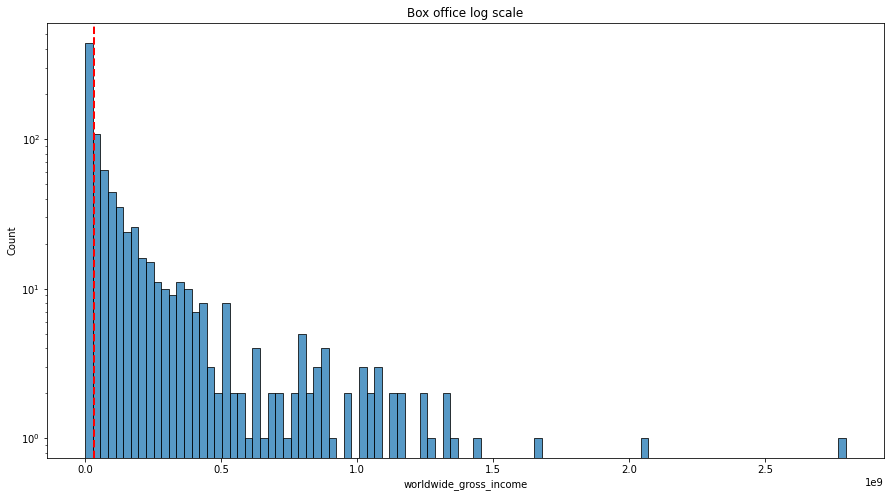

In [70]:
plt.figure(figsize = (15,8))
plt.title('Box office log scale')
plt.yscale('log')
plt.axvline(median, color='r', linestyle='dashed', linewidth=2)
p = sns.histplot(data = imdb['worldwide_gross_income'], bins=100)

In [72]:
mean = imdb['avg_vote'].median()
std = imdb['avg_vote'].std()
print(f'       mean        of movie rating: {"{:.2f}".format(mean)}')
print(f'standard deviation of movie rating: {"{:.2f}".format(std)}')

       mean        of movie rating: 6.40
standard deviation of movie rating: 0.94


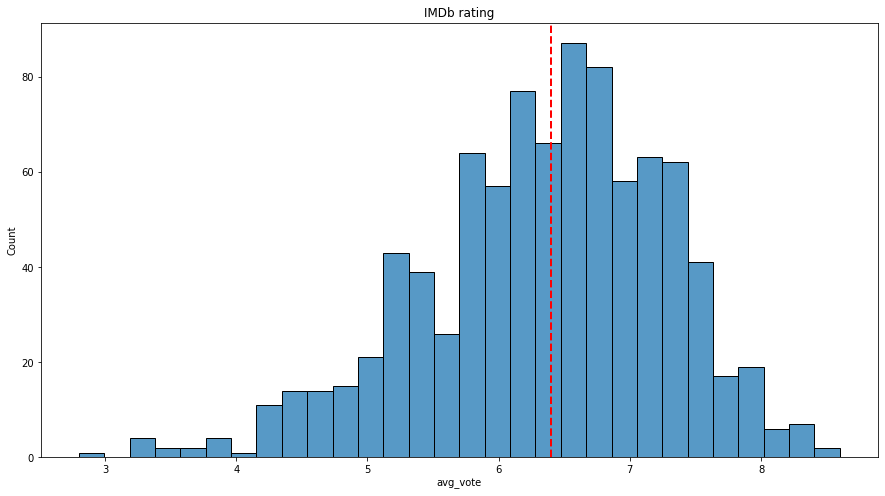

In [73]:
plt.figure(figsize = (15,8))
plt.title('IMDb rating')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
p = sns.histplot(data = imdb['avg_vote'], bins=30)

<AxesSubplot:title={'center':'Ratings'}, xlabel='avg_vote', ylabel='metascore'>

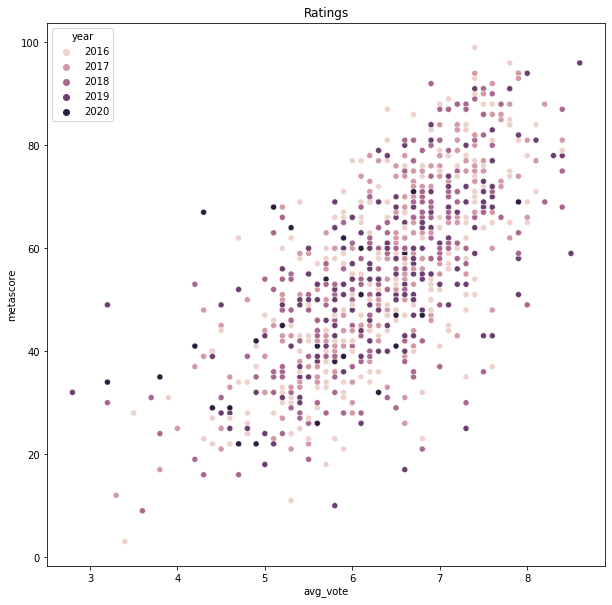

In [119]:
plt.figure(figsize = (10,10))
plt.title('Ratings')
sns.scatterplot(data=imdb, x="avg_vote", y="metascore", hue='year')

<BarContainer object of 20 artists>

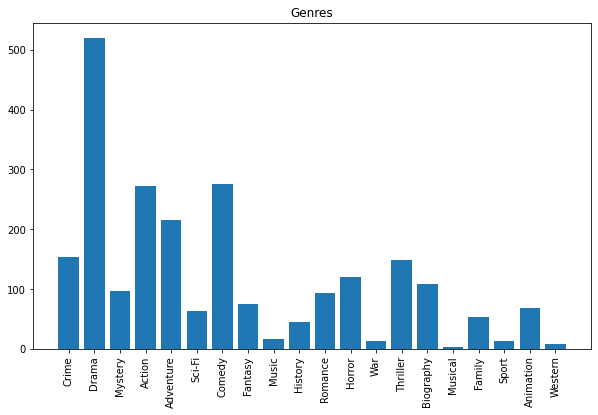

In [118]:
from collections import Counter
import itertools
genres = [genres.split() for genres in imdb['genre'].tolist()]
labels, values = zip(*Counter([genre.replace(',', '') for genre_list in genres for genre in genre_list]).items())
plt.figure(figsize = (10,6))
plt.title('Genres')
plt.xticks(rotation=90)
plt.bar(labels, values)